In [24]:
import joblib
from sqlalchemy import create_engine

import json
import plotly
import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from plotly.graph_objs import Bar
import joblib


In [2]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [3]:
engine = create_engine("sqlite:///data/DisasterResponse.db")
df = pd.read_sql_table("DisasterTweets", engine)

In [4]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
model_long = joblib.load("models/classifier_gridLong.pkl")
model_grid = joblib.load("models/classifier_grid.pkl")
model = joblib.load("models/classifier.pkl")

In [6]:
model_long.predict(["My parent's are gone"])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [7]:
model_grid.predict(["My parent's are gone"])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [8]:
model.predict(["My parent's are gone"])[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [9]:
model.predict_proba(["My parent's are gone"])

[array([[0.2       , 0.77733333, 0.02266667]]),
 array([[0.75, 0.25]]),
 array([[1., 0.]]),
 array([[0.64, 0.36]]),
 array([[0.91, 0.09]]),
 array([[1., 0.]]),
 array([[0.97, 0.03]]),
 array([[0.93, 0.07]]),
 array([[1., 0.]]),
 array([[1.]]),
 array([[0.93, 0.07]]),
 array([[0.85, 0.15]]),
 array([[0.82, 0.18]]),
 array([[0.8, 0.2]]),
 array([[0.9, 0.1]]),
 array([[0.99, 0.01]]),
 array([[1., 0.]]),
 array([[0.99, 0.01]]),
 array([[0.75, 0.25]]),
 array([[0.94, 0.06]]),
 array([[0.98, 0.02]]),
 array([[0.93, 0.07]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[0.98, 0.02]]),
 array([[0.95, 0.05]]),
 array([[0.85166667, 0.14833333]]),
 array([[0.96666667, 0.03333333]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[0.94, 0.06]]),
 array([[1., 0.]]),
 array([[0.96, 0.04]]),
 array([[0.73, 0.27]])]

In [21]:
df.related.max()

2.0

In [25]:
df.military.value_counts()

0.0    25347
1.0      860
Name: military, dtype: int64

In [24]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [6]:
freq_dict = {}
for col in df.columns[4:]:
    freq_dict.update({col: df[col].sum()})

In [7]:
freq_dict

{'related': 20298.0,
 'request': 4480.0,
 'offer': 119.0,
 'aid_related': 10878.0,
 'medical_help': 2087.0,
 'medical_products': 1314.0,
 'search_and_rescue': 724.0,
 'security': 471.0,
 'military': 860.0,
 'child_alone': 0.0,
 'water': 1674.0,
 'food': 2930.0,
 'shelter': 2319.0,
 'clothing': 406.0,
 'money': 604.0,
 'missing_people': 299.0,
 'refugees': 876.0,
 'death': 1196.0,
 'other_aid': 3448.0,
 'infrastructure_related': 1705.0,
 'transport': 1203.0,
 'buildings': 1335.0,
 'electricity': 534.0,
 'tools': 159.0,
 'hospitals': 283.0,
 'shops': 120.0,
 'aid_centers': 309.0,
 'other_infrastructure': 1151.0,
 'weather_related': 7302.0,
 'floods': 2158.0,
 'storm': 2448.0,
 'fire': 282.0,
 'earthquake': 2453.0,
 'cold': 530.0,
 'other_weather': 1376.0,
 'direct_report': 5080.0}

In [38]:
data_freq = pd.DataFrame.from_dict(freq_dict, orient="index", columns=["freq"])
data_freq

,freq
related,20298.0
request,4480.0
offer,119.0
aid_related,10878.0
medical_help,2087.0
medical_products,1314.0
search_and_rescue,724.0
security,471.0
military,860.0
child_alone,0.0


In [34]:
data_freq.columns

Index([0, 'freq'], dtype='object')

In [32]:
import plotly.express as px
fig = px.histogram(x=data_freq.index, y=data_freq.freq)
fig.show()

AttributeError: module 'plotly.express' has no attribute 'Bar'

In [33]:
len(df)

26207

In [39]:
import plotly.graph_objs as go

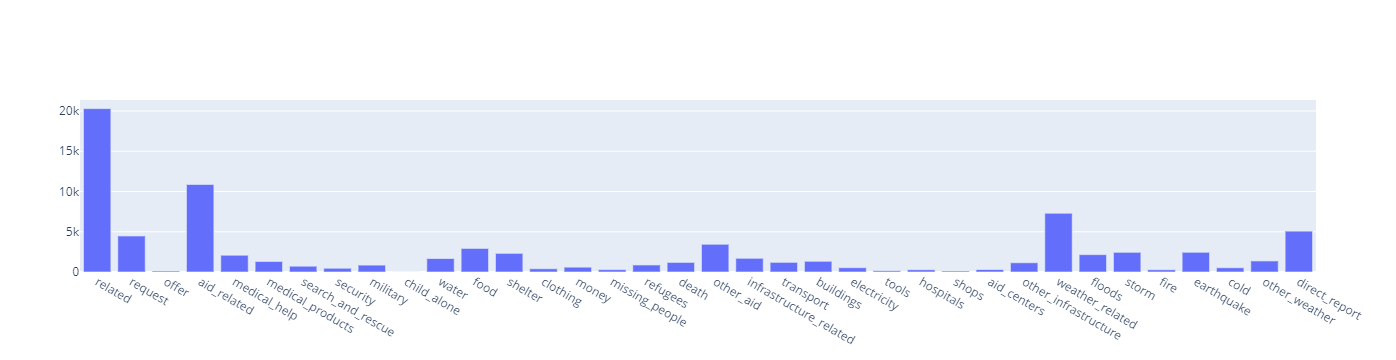

In [47]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(data_freq.index), y=data_freq.freq.values))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [49]:
cor = df[df.columns[4:]].corr()

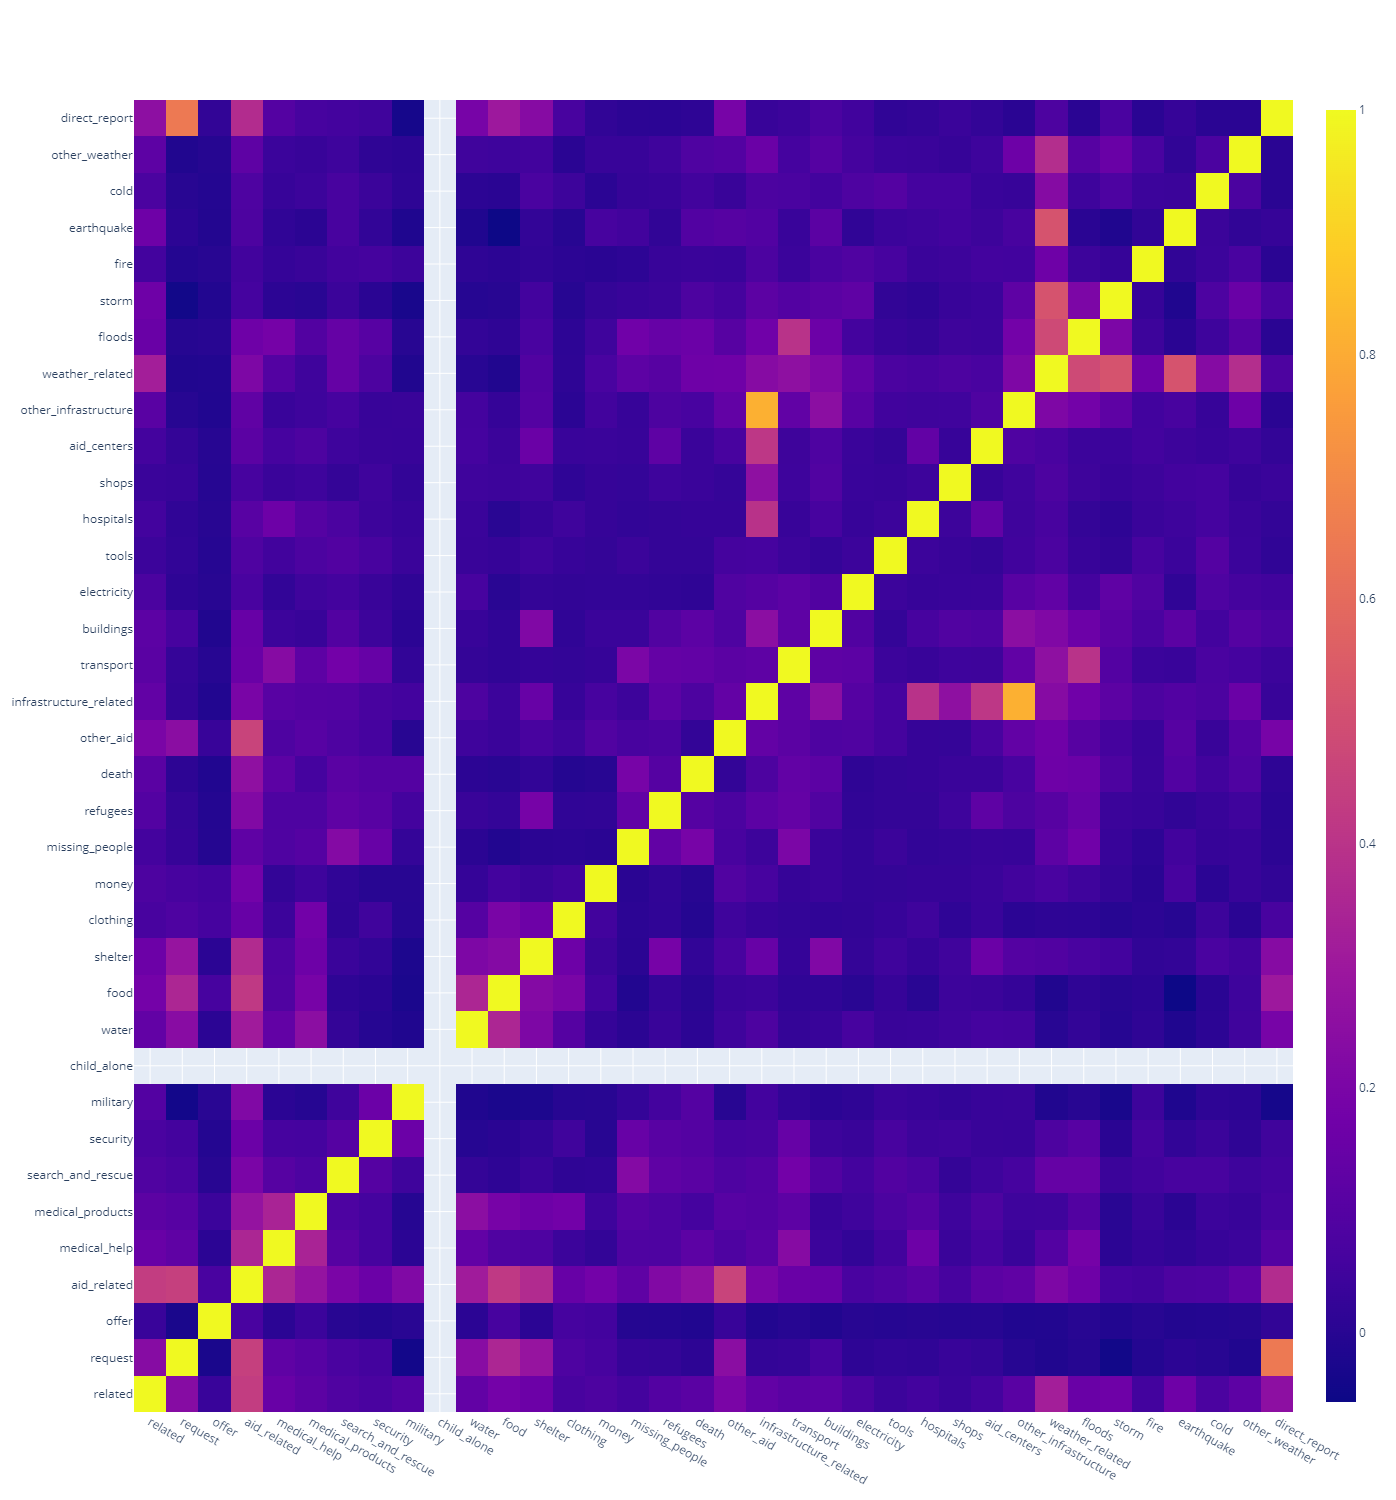

In [58]:
fig = go.Figure(data=go.Heatmap(
                   z=cor.to_numpy(),
                   x=df.columns[4:],
                   y=df.columns[4:],
                   hoverongaps = False))

fig.update_layout(
    xaxis_nticks=36,
    yaxis_nticks=36,
    width=1500,
    height=1500,)

fig.show()